### 대주제: 기후 변화에 따른 사회적, 환경적 변화 분석
- 4조 : 안효준, 도영환, 구성윤, 안윤호
    - 발표 순서 :  3조 > 2조 > 1조 > 4조 >  5조 >  6조 > 7조 > 8조

- 조별 주제 : 한국의 수온 변화에 따른 어획량 변화 분석
    - 기간 : 2014년 1월 1일 부터 2023년 12월 31일
    - 수온은 울릉도 기준, 난류성 어종과 한류성 어종을 나누어 분석
- 맡은 파트 : 난류성 어종 / 멸치
    - 난류성 어종인 멸치는 수온이 높아질 떄 어획량이 증가할 것으로 가정
        - 어종별 적정 수온이 다르기 때문
    - 분석결과 평균 수온은 올라갔으나 멸치 어획량은 감소 추세
    - 어획량은 수온 변화만이 아닌 다른 외부 요인과도 관련이 있을 것으로 추정
    - 1. 수온이 올라가면서 어린 멸치를 잡아먹는 정어리 개체 수가 증가함
        - 정어리의 어획량을 확인해보니 정어리의 어획량이 증가했음
    - 2. 2016년과 2021년은 전년대비 수온이 급격히 올랐던 해이다. 이때 멸치 어획량도 급감
    - 3. TAC(Total Allowable Catch);총허용어획량 제도의 시행 / 멸치는 22년부터 시범운영
        - 22년에 어획량이 낮아짐
        - 한국수산자원공단_사업소개_TAC

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import koreanize_matplotlib

# 어종별 어획량 데이터 : 단위는 톤
# 출처 : KOSIS

fish=pd.read_excel('어업별_품종별_통계.xlsx')

# 울릉도 20140101~20231231 수온
# 수온 데이터는 1년 단위로 10개 파일로 나눔(2014~2023)
# 출처 : 기상자료개방포털

wt_2014 = pd.read_csv('water_temp_2014.csv', encoding='euc_kr')
wt_2015 = pd.read_csv('water_temp_2015.csv', encoding='euc_kr')
wt_2016 = pd.read_csv('water_temp_2016.csv', encoding='euc_kr')
wt_2017 = pd.read_csv('water_temp_2017.csv', encoding='euc_kr')
wt_2018 = pd.read_csv('water_temp_2018.csv', encoding='euc_kr')
wt_2019 = pd.read_csv('water_temp_2019.csv', encoding='euc_kr')
wt_2020 = pd.read_csv('water_temp_2020.csv', encoding='euc_kr')
wt_2021 = pd.read_csv('water_temp_2021.csv', encoding='euc_kr')
wt_2022 = pd.read_csv('water_temp_2022.csv', encoding='euc_kr')
wt_2023 = pd.read_csv('water_temp_2023.csv', encoding='euc_kr')

In [3]:
temp_list = [wt_2014, wt_2015, wt_2016, wt_2017, wt_2018,
             wt_2019, wt_2020, wt_2021, wt_2022, wt_2023]

def make_month_temp(data):
    list_data = []
    for i in range(len(data)):
        list_data.append(data['일시'][i][:7])
    data['일시'] = list_data
    data

    month_temp = []
    for i in sorted(data['일시'].value_counts().index):
            month_temp.append(data[data['일시'] == i]['수온(°C)'].mean())
    return month_temp

def make_df(fish, *columns):
    total_temp = []
    for i in temp_list:
        total_temp += make_month_temp(i)
    fish_product = fish.loc[1:,columns]

    fish_data = []
    for i in range(1, len(fish_product)+1):
        fish_data.append(fish_product.loc[i].sum())

    year = []
    for i in range(1, len(fish['시점'])):
        year.append(int(fish['시점'][i]))

    year_month = []
    for i in list(fish['시점'][1:]):
        year_month.append(str(i) + '월')

    df = pd.DataFrame({'시점' : list(fish['시점'][1:]),
                       '어획량' : fish_data,
                       '수온' : total_temp,
                       '년도' : year,
                       '년월' : year_month})
    return df

In [4]:
make_month_temp(wt_2014)

[12.914825174825175,
 11.535285285285285,
 10.651902173913044,
 13.357103064066852,
 15.639945652173912,
 19.96606397774687,
 23.713324360699865,
 23.69523160762943,
 23.876685393258427,
 20.57810810810811,
 17.362064156206415,
 14.872177419354838]

In [5]:
fish['멸치']

0      생산량:계
1      24546
2       9320
3      13998
4       6492
       ...  
116    13828
117    16254
118    19793
119    10001
120     7170
Name: 멸치, Length: 121, dtype: object

In [6]:
fish['정어리']

0      생산량:계
1        119
2         27
3         65
4         14
       ...  
116     5889
117     4615
118     5798
119    11255
120     3486
Name: 정어리, Length: 121, dtype: object

In [7]:
anchovy = make_df(fish, '멸치')
anchovy

,시점,어획량,수온,년도,년월
0,2014.01,24546,12.914825,2014,2014.01월
1,2014.02,9320,11.535285,2014,2014.02월
2,2014.03,13998,10.651902,2014,2014.03월
3,2014.04,6492,13.357103,2014,2014.04월
4,2014.05,7171,15.639946,2014,2014.05월
...,...,...,...,...,...
115,2023.08,13828,27.354839,2023,2023.08월
116,2023.09,16254,25.313793,2023,2023.09월
117,2023.10,19793,21.706452,2023,2023.1월
118,2023.11,10001,19.380000,2023,2023.11월


In [8]:
sardine=make_df(fish, '정어리')
sardine

,시점,어획량,수온,년도,년월
0,2014.01,119,12.914825,2014,2014.01월
1,2014.02,27,11.535285,2014,2014.02월
2,2014.03,65,10.651902,2014,2014.03월
3,2014.04,14,13.357103,2014,2014.04월
4,2014.05,16,15.639946,2014,2014.05월
...,...,...,...,...,...
115,2023.08,5889,27.354839,2023,2023.08월
116,2023.09,4615,25.313793,2023,2023.09월
117,2023.10,5798,21.706452,2023,2023.1월
118,2023.11,11255,19.380000,2023,2023.11월


In [9]:
sum_anchovy=[]

for a in range(10):
    sum_anchovy.append(anchovy['어획량'][12*a:12*(a+1)].sum())

print(sum_anchovy)

[221375, 211575, 140958, 210943, 188685, 171675, 216748, 143414, 132152, 147768]


In [10]:
sum_sardine=[]

for a in range(10):
    sum_sardine.append(sardine['어획량'][12*a:12*(a+1)].sum())

print(sum_sardine)

[335, 2911, 5208, 8185, 7272, 2219, 1140, 90, 12029, 48029]


In [11]:
cnt=0
for a in make_month_temp(wt_2014):
    cnt=a+cnt
year14=cnt/len(make_month_temp(wt_2014))

cnt=0
for a in make_month_temp(wt_2015):
    cnt=a+cnt
year15=cnt/len(make_month_temp(wt_2015))

cnt=0
for a in make_month_temp(wt_2016):
    cnt=a+cnt
year16=cnt/len(make_month_temp(wt_2016))

cnt=0
for a in make_month_temp(wt_2017):
    cnt=a+cnt
year17=cnt/len(make_month_temp(wt_2017))

cnt=0
for a in make_month_temp(wt_2018):
    cnt=a+cnt
year18=cnt/len(make_month_temp(wt_2018))

cnt=0
for a in make_month_temp(wt_2019):
    cnt=a+cnt
year19=cnt/len(make_month_temp(wt_2019))

cnt=0
for a in make_month_temp(wt_2020):
    cnt=a+cnt
year20=cnt/len(make_month_temp(wt_2020))

cnt=0
for a in make_month_temp(wt_2021):
    cnt=a+cnt
year21=cnt/len(make_month_temp(wt_2021))

cnt=0
for a in make_month_temp(wt_2022):
    cnt=a+cnt
year22=cnt/len(make_month_temp(wt_2022))

cnt=0
for a in make_month_temp(wt_2023):
    cnt=a+cnt
year23=cnt/len(make_month_temp(wt_2023))

sea_temp=[year14,year15,year16,year17,year18,year19,year20,year21,year22,year23]
period=range(2014,2024)

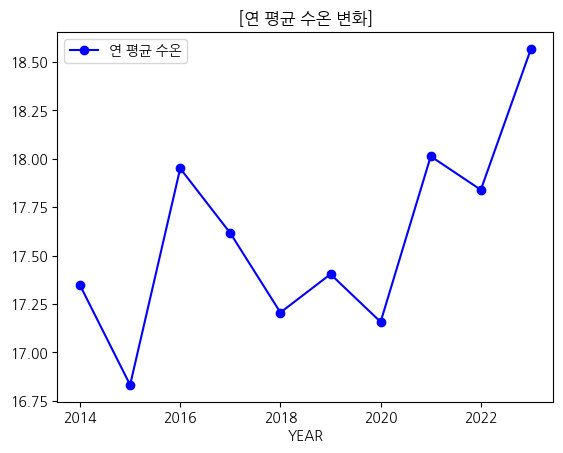

In [12]:
plt.plot(period,sea_temp,'bo-',label='연 평균 수온')
plt.title("[연 평균 수온 변화]")
plt.xlabel("YEAR")
plt.legend()
plt.show()

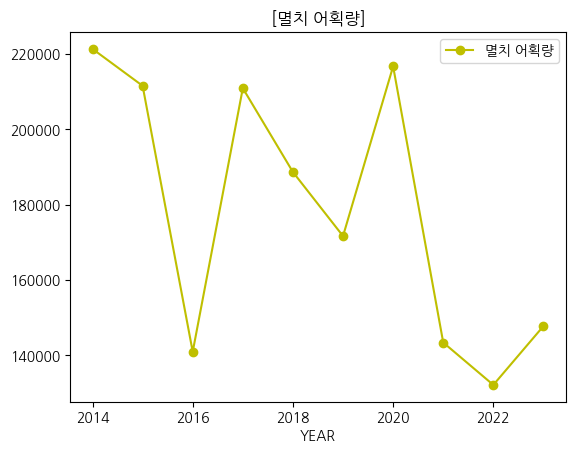

In [16]:
plt.plot(period,sum_anchovy,'yo-',label='멸치 어획량')
plt.title("[멸치 어획량]")
plt.xlabel("YEAR")
plt.legend()
plt.show()

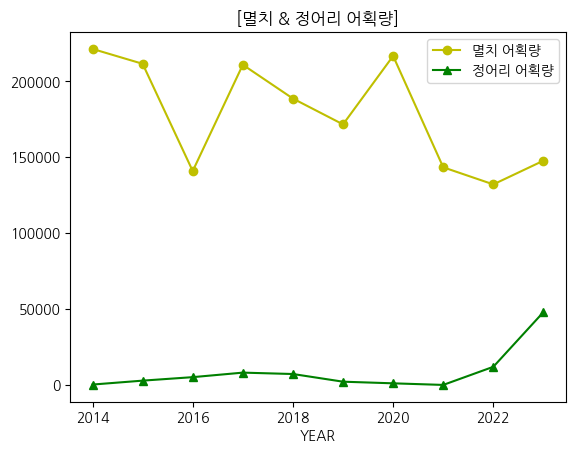

In [15]:
plt.plot(period,sum_anchovy,'yo-',label='멸치 어획량')
plt.plot(period,sum_sardine,'g^-',label='정어리 어획량')
plt.title("[멸치 & 정어리 어획량]")
plt.xlabel("YEAR")
plt.legend()
plt.show()

In [14]:
result=pd.concat([anchovy['어획량'],sardine['어획량']],axis=1)
result.corr(numeric_only=True)

,어획량,어획량
어획량,1.000000,-0.073885
어획량,-0.073885,1.000000
